## Chapter 5
# INTEGRALS AND DERIVATIVES

In [10]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import simps, cumtrapz
import bottleneck as fst
import pylab as plt
from time import clock

### Trapezoidal Rule

In [5]:
ndivs = 500
ntimes = 2000

def trpzsum1(f,a,b,divs=100):
    sum = -(f(b)-f(a))/2.0
    for x in np.linspace(a,b):
        sum += f(x)
    return sum*(b-a)/divs
    
def trpzsum2(f,a,b,divs=100):
    sum = -(f(b)-f(a))/2.0 + fst.nansum(f(np.linspace(a,b,divs)))
    return sum*(b-a)/divs

In [8]:
tic = clock()
for k in range(ntimes):
    trpzsum1(np.sin,0,np.pi,divs=ndivs)
print("with loop, walltime: ", clock()-tic)

tic = clock()
for k in range(ntimes):
    trpzsum2(np.sin,0,np.pi,divs=ndivs)
print("with comprehension, walltime: ", clock()-tic)

tic = clock()
for k in range(ntimes):
    cumtrapz(np.sin(np.linspace(0.,np.pi,ndivs)))*np.pi/ndivs
print("with scipy routines (direct call), walltime: ", clock()-tic)

with loop, walltime:  0.31916699999999976
with comprehension, walltime:  0.11978299999999997
with scipy routines (direct call), walltime:  0.16697499999999987


## Simpson rule

In [40]:
def smpssum(f,a,b,divs=100):
    oddsum = fst.nansum(f(np.linspace(a,b,divs)[1:-1:2]))
    evensum = fst.nansum(f(np.linspace(a,b,divs)[2:-1:2]))
    return (f(a)+f(b)+4*oddsum+2*evensum)*(b-a)/(3*divs)

In [41]:
%%time
smpssum(np.sin,0.0,np.pi,500)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 277 µs


1.9959934070735332

## Adaptive trapezoidal rule

In [14]:
def oddsum(f,a,b,divs):
    return fst.nansum(f(np.linspace(a,b,divs)[1:-1:2]))

def adaptivetrpz(f,a,b,err=1e-3):
    divs = 32
    itermax = 20
    
    divmax = divs*2**itermax
    
    I = (.5*f(a)+.5*f(b)+fst.nansum(f(np.linspace(a,b,divs))))*(b-a)/divs
    
    divs *= 2
    J = I/2.0 + oddsum(f,a,b,divs)
    
    while abs(I-J)/3.0 > err:
        if divs > divmax:
            break
            print("WARNING: Maximum number of iterations reached")
        I, J = J, I
        
        divs *= 2
        J = I/2.0 + oddsum(f,a,b,divs)*(b-a)/divs
    
    return I, abs(I-J)/3.0
        

In [16]:
adaptivetrpz(np.sin,0.0,np.pi,err=1e-5)

(2.0000357059688625, 5.9559618676985338e-06)

## Adaptive Simpson rule

In [ ]:
def evensum(f,a,b,divs):
    return fst.nansum(f(np.linspace(a,b,divs)[2:-1:2]))

def adaptivesmps(f,a,b,err=1e-4):
    divs = 32
    itermax = 20
    
    divmax = divs*2^itermax
    
    S = evensum(f,a,b,divs)/3.0
    R = oddsum(f,a,b,divs)*2.0/3.0
    I = (S+T)*(b-a)/divs
    
    divs *= 2
    S += R

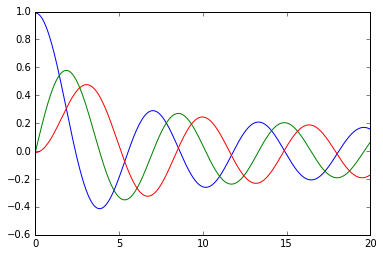

<function matplotlib.pyplot.close>

In [9]:
def besselJ(j,x,divs=99):
    def f(j,x,theta): return np.cos(j*theta-x*np.sin(theta))
    h = np.pi/divs
    oddSum = fst.nansum([f(j,x,h*n) for n in range(1,divs) if n%2 == 1])
    evenSum = fst.nansum([f(j,x,h*n) for n in range(1,divs) if n%2 == 0])
    return (f(1,x,0)+f(1,x,np.pi)+4*evenSum+2*oddSum)/(3*divs)

x = np.linspace(0.0,20.0,1000)
plt.figure("bessel_function")
for i in range(3):
    plt.plot(x,[besselJ(i,z) for z in x])
plt.show()
plt.close

In [5]:
def intensity(x,y,k=1.0):
    r = np.sqrt(x*x+y*y)
    return (besselJ(1,r*k)/(r*k))**2

l = 1.0
pts = 100
side = np.linspace(-l,l,pts)
x = np.empty([pts,pts])
z = np.empty([pts,pts])
for i in range(pts):
    for j in range(pts):
        x[i][j] = side[i]
        z[i][j] = intensity(side[i],side[j],k=4*np.pi)

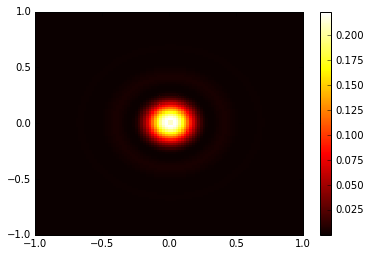

In [104]:
plt.pcolormesh(x,np.transpose(x),z,cmap='hot')
plt.colorbar()

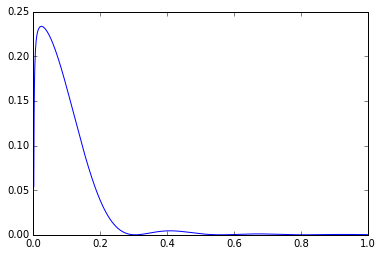

In [10]:
xx = np.linspace(0.001,1,1000)
plt.plot(xx,[intensity(z,0,k=4*np.pi) for z in xx])

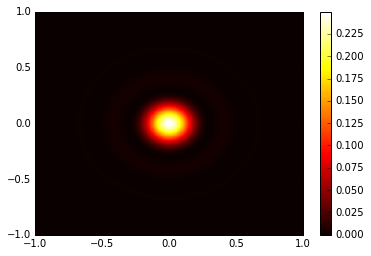

In [22]:
from scipy.special import j1

side = np.linspace(-1,1,500)
x, y = plt.meshgrid(side,side)
k = 4*np.pi
r = np.sqrt(x**2+y**2)
z = (j1(k*r)/(k*r))**2
plt.pcolormesh(x,y,z,cmap='hot')
plt.colorbar()
